<h2> Importing Important Packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

<h2>Importing Dataset that already preprocessed

In [2]:
path_to_file = 'data/padi.csv'
province = 'DI YOGYAKARTA'
sliding_window = 5
train_test_proportion = 0.8

from preprocessing import preprocess

data = pd.read_csv(path_to_file)
preprocessed = preprocess(data[data['Provinsi'] == province],\
                            sliding_window)

preprocessed.head()

/home/cdjodistiara/anaconda3/envs/tf-keras/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,0,1,2,3,4,5
0,644642,643266,642120,661179,647198,621605
1,643266,642120,661179,647198,621605,612393
2,642120,661179,647198,621605,612393,654289
3,661179,647198,621605,612393,654289,661802
4,647198,621605,612393,654289,661802,653577


<h2> Split Dataset into 2 gourp (train and test test)

In [3]:
train_data = preprocessed[:int(train_test_proportion*preprocessed.shape[0])]
test_data = preprocessed.drop(train_data.index)

train_labels = train_data.pop(train_data.columns[-1])
test_labels = test_data.pop(test_data.columns[-1])

<h2> make Modeling function

In [13]:
def build_model():
    model = keras.Sequential([
        layers.Dense(2, activation=tf.nn.relu,
                     input_shape=[len(train_data.keys())]),
        layers.Dense(5, activation=tf.nn.relu),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(loss='mae', optimizer='adam', metrics=['mse'])

    return model

In [14]:
tf.random.set_seed(28)

model = build_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


<h2> Train Regression model 

In [23]:
epochs = 1000
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(train_data, train_labels, epochs=epochs, validation_split=0.2, verbose=1, callbacks=[early_stop])

Train on 11 samples, validate on 3 samples
Epoch 1/1000
11/11 [==============================] - 0s 858us/sample - loss: 32729.9883 - mse: 1674335872.0000 - val_loss: 88973.7734 - val_mse: 7953558016.0000
Epoch 2/1000
11/11 [==============================] - 0s 683us/sample - loss: 32113.5508 - mse: 1652592256.0000 - val_loss: 91631.8750 - val_mse: 8433244672.0000
Epoch 3/1000
11/11 [==============================] - 0s 784us/sample - loss: 31900.3242 - mse: 1641903232.0000 - val_loss: 94125.8984 - val_mse: 8896177152.0000
Epoch 4/1000
11/11 [==============================] - 0s 732us/sample - loss: 31707.4082 - mse: 1642318592.0000 - val_loss: 96472.3359 - val_mse: 9343078400.0000
Epoch 5/1000
11/11 [==============================] - 0s 1ms/sample - loss: 31525.7949 - mse: 1651938816.0000 - val_loss: 98685.8359 - val_mse: 9774756864.0000
Epoch 6/1000
11/11 [==============================] - 0s 675us/sample - loss: 31354.3750 - mse: 1669224960.0000 - val_loss: 100779.7109 - val_mse: 10

Epoch 51/1000
11/11 [==============================] - 0s 2ms/sample - loss: 30951.1992 - mse: 1792457472.0000 - val_loss: 106381.7500 - val_mse: 11352609792.0000
Epoch 52/1000
11/11 [==============================] - 0s 970us/sample - loss: 30951.0059 - mse: 1792588160.0000 - val_loss: 106264.0391 - val_mse: 11327614976.0000
Epoch 53/1000
11/11 [==============================] - 0s 1ms/sample - loss: 30940.6309 - mse: 1789999616.0000 - val_loss: 106035.6641 - val_mse: 11279180800.0000
Epoch 54/1000
11/11 [==============================] - 0s 708us/sample - loss: 30921.0000 - mse: 1785010048.0000 - val_loss: 105707.1250 - val_mse: 11209677824.0000
Epoch 55/1000
11/11 [==============================] - 0s 931us/sample - loss: 30892.9609 - mse: 1777958528.0000 - val_loss: 105287.6484 - val_mse: 11121246208.0000
Epoch 56/1000
11/11 [==============================] - 0s 1000us/sample - loss: 30857.3691 - mse: 1769201280.0000 - val_loss: 104785.7109 - val_mse: 11015890944.0000
Epoch 57/1000

Epoch 101/1000
11/11 [==============================] - 0s 717us/sample - loss: 30798.6426 - mse: 1762483328.0000 - val_loss: 104789.4609 - val_mse: 11017573376.0000


<h2> Plotting Training Process

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

#Show last Epoch matrics result
hist.tail()

,loss,mse,val_loss,val_mse,epoch
142,35976.433594,1.924887e+09,76405.187500,5.876848e+09,142
143,35073.238281,1.858622e+09,78803.148438,6.248665e+09,143
144,34508.703125,1.799506e+09,81265.414062,6.642426e+09,144
145,33928.914062,1.748518e+09,83785.289062,7.057959e+09,145
146,33335.546875,1.706539e+09,86356.601562,7.495068e+09,146


In [21]:
def ploting_history(history):

    plt.figure(figsize=(14,8))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error (Target)')
    plt.plot(hist['epoch'], hist['loss'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Error')
    plt.legend()
    # plt.ylim([0, 5])

    plt.figure(figsize=(14,8))
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error (Target^2)')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
    plt.legend()
    # plt.ylim([0, 20])

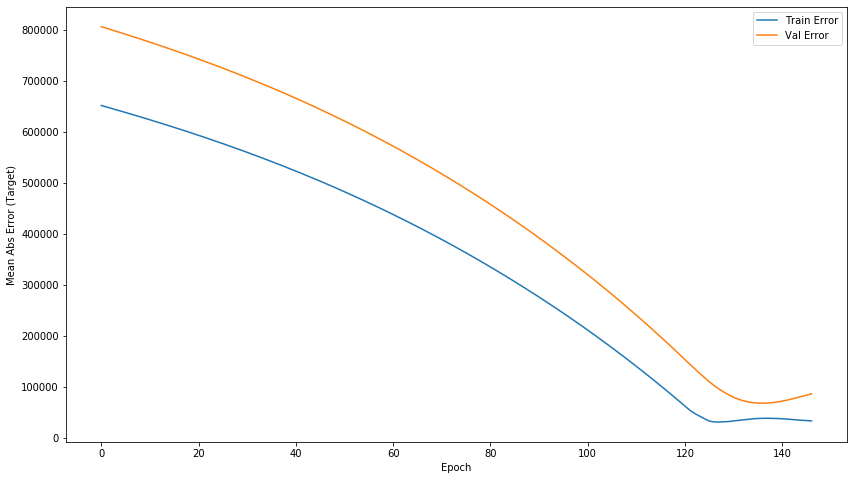

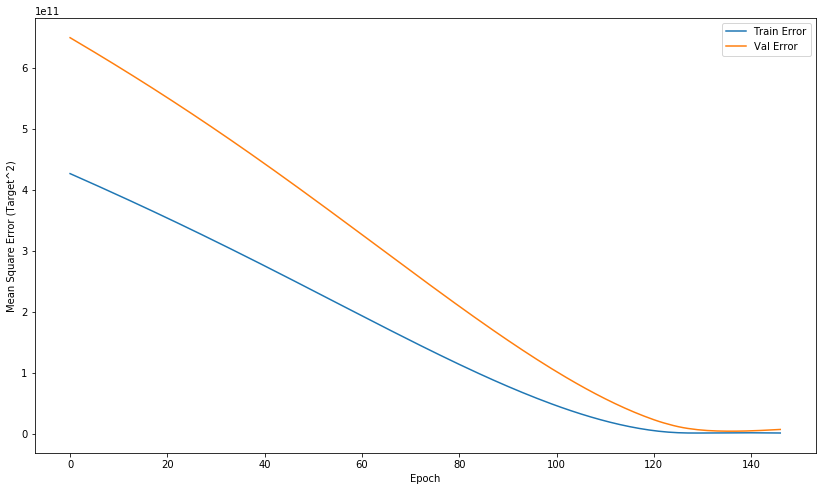

In [22]:
ploting_history(history)

<h2> Checking Evaluation metrics model

In [ ]:
model.evaluate(test_data, test_labels, verbose=0)
#     print("Test Set Mean Abs Error : {:5.2f} Comodity in ton".format(mae))

<h2> Predicting Test data

In [11]:
predict = model.predict(test_data).flatten()

predict = pd.DataFrame(list(zip(predict, test_labels.tolist())), 
               columns =['Prediction','Actual'])

predict['error'] = (abs(predict['Actual'] - predict['Prediction'])/
                               predict['Prediction'])
predict

,Prediction,Actual,error
0,797749.2500,946224,0.186117
1,875550.0625,921824,0.052851
2,873597.4375,919573,0.052628
3,885484.2500,945136,0.067366


In [12]:
print(predict.error.mean())

NameError: name 'predicted_vs_actual' is not defined

In [ ]:
__, mae, __ = model.evaluate(test_data, test_labels, verbose=0)
print("Test Set Mean Abs Error : {:5.2f} Comodity in ton".format(mae))